In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv("train.csv")
print(df.head())

label = df['label']

df_input = df.drop("label",axis = 1)
print(df_input.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [9]:
print("shape of df :",df.shape)
print("shape of df_input :",df_input.shape)

shape of df : (42000, 785)
shape of df_input : (42000, 784)


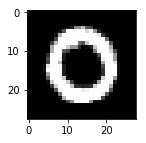

In [10]:
#plot the number
plt.figure(figsize=(2,2))


grid_data = df_input.iloc[1].values.reshape(28,28)
plt.imshow(grid_data, cmap = "gray")


In [11]:
#Reducing the data for demo

labels = label.head(10000)
data = df_input.head(10000)

print("shape of data is: ",data.shape)

shape of data is:  (10000, 784)


In [12]:
# Data Processing 

#Step 1 : standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


C:\Users\manish.khati\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(10000, 784)


C:\Users\manish.khati\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
#Step 2 : Find the co-variance matrix A^T * A

sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T, sample_data)

print("Shape of covariance matrix :", covar_matrix.shape)

Shape of covariance matrix : (784, 784)


In [14]:
# Step 3 - FInd the eigen value and coresponding eigen vector

from scipy.linalg import eigh

#eigh function returns the eigen values in ascending order.
# If we need to reduce the dimensionality to 2 D then top 2 eigen values 
#need to be considered

values, vectors = eigh(covar_matrix, eigvals = (782,783))

print("shape of eigen vector : ",vectors.shape)

# Converting the eigen vectors into (2,d) shape for 
#easiness of further computations
#vectors = vectors.T
#print("Updates shape of eigen vector : ",vectors.shape)

#vectors[1]

shape of eigen vector :  (784, 2)


In [15]:
values

array([287901.13418243, 407145.7769519 ])

In [39]:
#Projecting the original data sample on the plane
#formed by two principal eigen vectors by vector vector multiplication

new_coordinates = np.matmul(sample_data,vectors)

print("Shape of new data points :", new_coordinates.shape)

Shape of new data points : (10000, 2)


In [50]:
#Adding label to 2D data

dataframe = pd.DataFrame(new_coordinates, columns = ("1stPCA","2ndPCA"))
dataframe = pd.concat([dataframe,labels], axis = 1)
dataframe.head()

,1stPCA,2ndPCA,label
0,-5.448069,-4.949725,1
1,6.833972,18.966372,0
2,-2.051008,-7.527935,1
3,5.555069,-0.715448,4
4,7.291958,26.253689,0


C:\Users\manish.khati\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


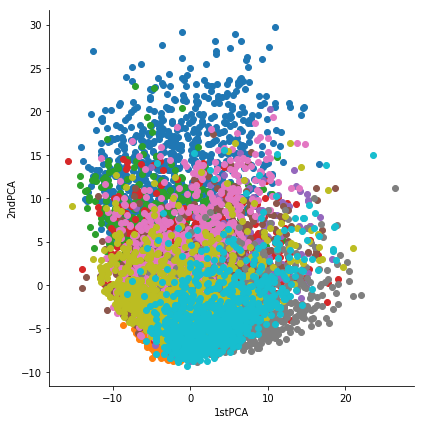

In [55]:
import seaborn as sn
sn.FacetGrid(dataframe, hue = "label", size = 6).map(plt.scatter,"1stPCA","2ndPCA")

# PCA in Scikit-learn


In [56]:
from sklearn import decomposition
pca = decomposition.PCA()

In [64]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print("shape of the reduced PCA : ",pca_data.shape)

shape of the reduced PCA :  (10000, 2)


In [65]:
labels.shape

(10000,)

In [66]:
# attaching the lables
#type(pca_data)

dataframe = pd.DataFrame(pca_data, columns = ("1stPCA","2ndPCA"))
dataframe = pd.concat([dataframe,labels], axis = 1)
dataframe.head()

#pca_data = np.vstack((pca_data.T,labels)).T

,1stPCA,2ndPCA,label
0,-4.949811,-5.448514,1
1,18.966317,6.833723,0
2,-7.527869,-2.050670,1
3,-0.715416,5.555214,4
4,26.253622,7.291542,0


C:\Users\manish.khati\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


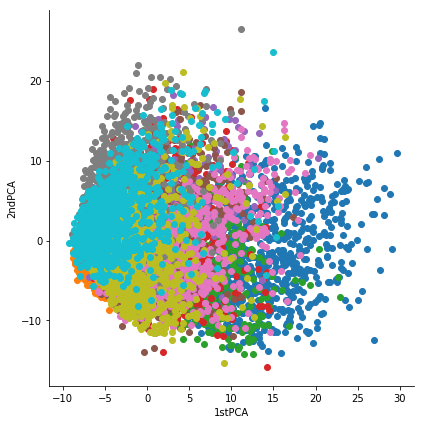

In [67]:
sn.FacetGrid(dataframe, hue = "label", size = 6).map(plt.scatter,"1stPCA","2ndPCA")

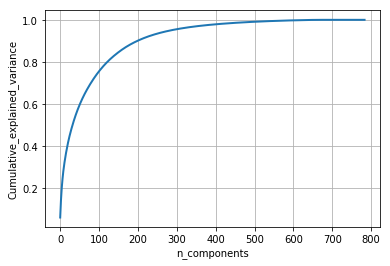

In [73]:
#PCA for dimensionality Reduction (non visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)

plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()